# Test: Bestimmung Precision / Recall
Um die Klassifikation, und damit auch von dem Aufbau unserer Matrix, zu testen, bestimmen wir Precision und Recall.

* Precision: Wieviele der zugeordneten Samples sind tatsächlich relevant? (true pos.) / (true pos. + false pos.)
* Recall: Wieviele der tatsächlich relevanten Samples wurden gefunden / zugeordnet? (true pos.) / (true pos. + false neg.)
 * Tiefe Precision / hoher Recall: Es werden viele Samples zugeordnet, von denen jedoch viele falsch sind
 * Hohe Precision / tiefer Recall: Es werden nur wenige Samples zugeordnet, von denen jedoch die meisten stimmen.
<img src="img/Precisionrecall.png" alt="Drawing" style="width: 200px"/>

## Optimierung
Mit diesem Test versuchen wir die Konfiguration der SVM möglichst gut auf unsere Datenstruktur auszurichten.
### Kernel
Der Kernel definiert, mit welcher Art Funktion die Datenpunkte im 2D-Raum voneinander getrennt werden. Standardmässig wird dazu eine lineare Funktion (linear kernel) verwendet. Wenn die Punkte im training set nicht durch eine Gerade trennbar sind, versucht man sie in einer höheren Dimension voneinander zu trennen. Die erreicht man durch andere kernel-Funktionen (z.B. Polynomial oder RBF).
Bei vielen Features, wie es bei unseren Daten der Fall ist, bringt eine höhere Dimension keine Vorteile, ist aber sehr teuer. Entsprechend verwenden wir einen linearen Kernel.

#### Parameter
Der lineare Kernel verlangt ausschliesslich einen Penalty Parameter C. 
M
* C=0.1: Precision 0.777777777778, Recall 0.21875
* C=0.2: Precision 0.785714285714, Recall 0.34375
* C=0.3: Precision 0.769230769231, Recall 0.3125
* C=0.4: Precision 0.714285714286, Recall 0.3125
* C=0.5: Precision 0.666666666667, Recall 0.3125
* C=0.6: Precision 0.555555555556, Recall 0.3125
* C=0.7: Precision 0.555555555556, Recall 0.3125
* C=0.8: Precision 0.578947368421, Recall 0.34375
* C=0.9: Precision 0.578947368421, Recall 0.34375
* C=1: Precision 0.578947368421, Recall 0.34375

Length Data Test (300, 14443)
Nonzero Data Test 2362
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

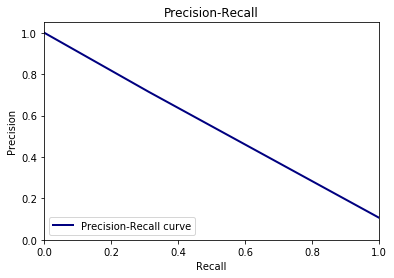

In [12]:
import matplotlib.pyplot as plts
import numpy as np
import cPickle as pickle

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve

# Read pickle
data = None
with open('data/feature_matrix_sparse.pickle', 'rb') as f:
    sparse = pickle.load(f)

rows = sparse[2]
columns = sparse[3]
data = np.zeros((len(rows), len(columns) + 1), dtype=np.uint8)
data[:,-1:] = sparse[1]
for i, j in sparse[0]:
    data[i, j] = 1

# Define data and target
target = data[:, 14443]
target[target > 1] = 1
data = data[:, range(14443)]

# print('Length Target {}'.format(target.size))
# print('Nonzero {}'.format(np.count_nonzero(target)))

# Define test- and trainingset for target
target_test = target[-300:]
target_train = target[:2000]
#target_train = target[:-30]


# Define test- and trainingset for data
data_test = data[-300:]
data_train = data[:2000]
#data_train = data[:-30]


print('Length Data Test {}'.format(data_test.shape))
print('Nonzero Data Test {}'.format(np.count_nonzero(data_test)))

# Create classifier
clf = svm.SVC(kernel='linear', C=0.2)

# Fit model
clf.fit(data_train, target_train)

# Predict remaining data
target_score = clf.predict(data_test)

print(target_test)
print(target_score)
#
# Compute Precision-Recall
precision, recall, thresholds = precision_recall_curve(target_test, target_score)
#
# Print Precision and Recall
print('Precision {}, Recall {}'.format(precision[1], recall[1]))

# Plot precision-recall-curve
plt.clf()
plt.plot(recall, precision, lw=2, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()
